## Importing Libraries

In [ ]:
##Tensorflow Installation Guide using conda
!conda create --name tensorflow_env python=3.8
#Activating env
!conda activate tensorflow_env
#Install Tensorflow in that env
!conda install tensorflow-gpu

In [ ]:
!pip install nltk
!pip install bs4

In [1]:
import nltk
import pandas as pd
import numpy as np
import tensorflow as tf
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

In [ ]:
##Downloading nltk packages
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/animesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading Dataset

In [4]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df = data.dropna()

In [6]:
data.shape

(50000, 2)

In [7]:
df.shape

(50000, 2)

In [8]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Text Preprocessing

In [ ]:
punctuation = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
lm = WordNetLemmatizer()

In [10]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = "".join([char.lower() for char in text if char not in punctuation])
    tokens = word_tokenize(text)
    text = " ".join([lm.lemmatize(char) for char in tokens if char not in stopwords])
    return text

In [11]:
X = df['review'].apply(lambda x: clean_text(x))

In [12]:
Y = df = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [13]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [14]:
##Average num of words in text
sum=0
for i in X.to_list():
    sum+=len(i.split(" "))
avg = sum/len(X.to_list())
avg


119.84288

In [15]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,TextVectorization, Dropout

## Text Vectorization

In [17]:
vocab_size = 20000
max_len = 200
vectorize_layer = TextVectorization(
 max_tokens=vocab_size,
 output_mode='int',
 output_sequence_length=max_len)

2025-07-01 22:59:45.077340: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
# build the vocabulary
vectorize_layer.adapt(X_train)

In [19]:
vocab = np.array(vectorize_layer.get_vocabulary())
#First 50 vocabulary
vocab[:50]

array(['', '[UNK]', 'movie', 'film', 'one', 'like', 'time', 'good',
       'character', 'even', 'story', 'get', 'would', 'see', 'make',
       'really', 'scene', 'much', 'well', 'people', 'great', 'bad',
       'also', 'show', 'first', 'way', 'dont', 'thing', 'made', 'could',
       'think', 'life', 'go', 'know', 'watch', 'many', 'love', 'seen',
       'actor', 'two', 'plot', 'never', 'say', 'look', 'best', 'acting',
       'little', 'end', 'year', 'ever'], dtype='<U20')

In [20]:
x1 = vectorize_layer(X_train)

In [21]:
X_train.shape

(37500,)

In [22]:
x1

<tf.Tensor: shape=(37500, 200), dtype=int64, numpy=
array([[   74,   238,  3810, ...,     0,     0,     0],
       [  506,     5,     2, ...,     0,     0,     0],
       [  518,   358,   259, ...,     0,     0,     0],
       ...,
       [  116, 17528,  2538, ...,  3158,   466,   225],
       [  138,  1847,     2, ...,     0,     0,     0],
       [19834,  3650,  5306, ...,     0,     0,     0]])>

In [23]:
vocab

array(['', '[UNK]', 'movie', ..., 'lid', 'lew', 'letterbox'], dtype='<U20')

In [24]:
##Search indices of word
foleys = np.where(vocab == 'noir')
foleys

(array([1601]),)

In [25]:
X_train.to_list()[2]

'ok 3 word cheesy cheesy cheesy redeeming feature movie dean cain cheeseball supremethe movie promise concept underground lab creates real live fire breathing dragon basically giving u jurassic park meet reign fire great possibility dont follow special effect decent even though know dragon cgi doesnt horribly look like cgi wouldnt lay blame dean cain although one producer id lay blame phillip roth director writer job make film unfortunately failed'

In [26]:
x1[2,:]

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([ 518,  358,  259,  794,  794,  794, 1565,  339,    2, 2115, 7425,
          1,    1,    2, 1479,  893, 2429, 3366, 1935,   67,  325,  795,
       6484, 2114,  583,  607,   78, 6405, 1100,  375, 4975,  795,   20,
       2174,   26,  754,  204,  143,  439,    9,   74,   33, 2114, 1472,
         68, 2053,   43,    5, 1472,  466, 2907, 1439, 2115, 7425,  180,
          4,  570,  361, 2907, 1439, 6902, 5198,   63,  335,  179,   14,
          3,  406, 1076,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

## Building LSTM Model

In [ ]:
model = Sequential()
# (1,) (because we need to guarantee that there is exactly one string
# input per batch), and the dtype needs to be 'string'.
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))

model.add(vectorize_layer)
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 200)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 200, 100)          2000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [28]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

## Model Training

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=32,epochs=10,
                    callbacks = [early_stop])

Epoch 1/10
1172/1172 [==============================] - 100s 85ms/step - loss: 0.6929 - accuracy: 0.5086 - val_loss: 0.6932 - val_accuracy: 0.4972
Epoch 2/10
1172/1172 [==============================] - 98s 83ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4972
Epoch 3/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.6933 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 4/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.6842 - accuracy: 0.5271 - val_loss: 0.6768 - val_accuracy: 0.5487
Epoch 5/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.6160 - accuracy: 0.6663 - val_loss: 0.5669 - val_accuracy: 0.7344
Epoch 6/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.4852 - accuracy: 0.7968 - val_loss: 0.4838 - val_accuracy: 0.7846
Epoch 7/10
1172/1172 [==============================] - 97s 83ms/step - loss: 0.4368 - accuracy: 0.8093 - val_loss: 0.3981 

In [ ]:
##Saving Model
model.save("./Sentiment_Classifier_v1")

INFO:tensorflow:Assets written to: ./Sentiment_Classifier_1/assets


INFO:tensorflow:Assets written to: ./Sentiment_Classifier_1/assets


### Accuracy Visualization

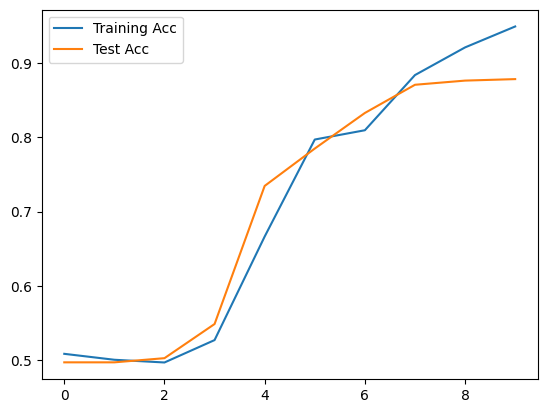

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Test Acc')
plt.legend()
plt.show()

### Testing Model on random text

In [32]:
Test_text = 'The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.'
prediction = model.predict(np.array([Test_text]))
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 [==============================] - 0s 348ms/step
Positive Sentiment 
Score: 0.84139293


In [33]:
Test_text = 'The movie was good in first-half, but second half is worst, so i hate it'
prediction = model.predict(np.array([Test_text]))
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 [==============================] - 0s 36ms/step
Negative Sentiment 
Score: 0.015400934


## Model Evaluation
- Precision
- Recall
- F1-score
- Confusion Matrix

In [34]:
type(X_test)

pandas.core.series.Series

In [35]:
y_pred = model.predict(X_test.to_list())
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
y_pred_binary

391/391 [==============================] - 7s 17ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [36]:
y_pred_binary.shape

(12500, 1)

In [37]:
y_true = np.array([Y_test.to_list()]).T
y_true.shape

(12500, 1)

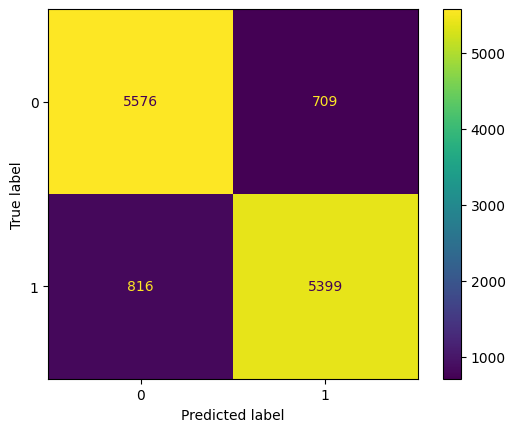

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred_binary))
disp.plot()

In [39]:
print(classification_report(y_true, y_pred_binary))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6285
           1       0.88      0.87      0.88      6215

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500

